#### Importing required libraries

In [62]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

[Dataset source] (https://archive.ics.uci.edu/ml/datasets/heart+disease)

#### 1. Loading dataset

In [2]:
df = pd.read_csv("cleveland.csv")

# displaying data head up to 10 rows
# display(df.head(10)) 
display(df.sample(10))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
62,58,1,4,128,216,0,2,131,1,2.2,2,3,7,1
59,51,1,1,125,213,0,2,125,1,1.4,1,1,3,0
93,44,0,3,108,141,0,0,175,0,0.6,2,0,3,0
118,63,1,4,130,330,1,2,132,1,1.8,1,3,7,3
202,57,1,3,150,126,1,0,173,0,0.2,1,1,7,0
219,59,1,4,138,271,0,2,182,0,0.0,1,0,3,0
40,65,0,4,150,225,0,2,114,0,1.0,2,3,7,4
207,50,1,4,144,200,0,2,126,1,0.9,2,0,7,3
136,70,1,4,145,174,0,0,125,1,2.6,3,0,7,4
241,41,0,2,126,306,0,0,163,0,0.0,1,0,3,0


#### Description of the columns

- age = age in years
- sex = sex (1 = male; 0 = female)
- cp  = chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
- trestbps = resting blood pressure (in mm Hg on admission to the hospital) 
- chol = serum cholestoral in mg/dl
- fbs  = fasting blood sugar > 120 mg/dl)(1 = true; 0 = false) 
- restecg = resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria, 'thalach',
- thalach: maximum heart rate achieved
- exang = exercise induced angina (1 = yes; 0 = no)  
- oldpeak = ST depression induced by exercise relative to rest
- slope = the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
- ca = number of major vessels (0-3) colored by flourosopy
- thal = 3- normal; 6- fixed defect; 7- reversable defect
- num = diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

#### 2. Separating the features and target variable

In [3]:
# features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']

# target = ['num']

#### 3. Dealing with missing values

In [4]:
# Showing data dimention, data types and missing values
print("Data dimension: ", df.shape)
df.info()

Data dimension:  (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [5]:
# summarize the dataset
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope         num  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std      0.994971   22.875003 

In [7]:
# Printing unique values
print("cp unique value: ", df['cp'].unique())
print("fbs unique value: ", df['fbs'].unique())
print("restecg unique value: ", df['restecg'].unique())
print("exang unique value: ", df['exang'].unique())
print("slope unique value: ", df['slope'].unique())
print("ca unique value: ", df['ca'].unique())
print("thal unique value: ", df['thal'].unique())
print("num: ", df['num'].unique())

cp unique value:  [1 4 3 2]
fbs unique value:  [1 0]
restecg unique value:  [2 0 1]
exang unique value:  [0 1]
slope unique value:  [3 2 1]
ca unique value:  ['0' '3' '2' '1' '?']
thal unique value:  ['6' '3' '7' '?']
num:  [0 2 1 3 4]


In [8]:
# count the number of missing values for each column
num_missing_ca = (df['ca'] == "?").sum()
num_missing_thal = (df['thal'] == "?").sum()
# report the results
print("Number of missing ca = ", num_missing_ca)
print("Number of missing thal = ", num_missing_thal)

Number of missing ca =  4
Number of missing thal =  2


<font color=red>__There are 4 missing values in 'ca' and 2 values in 'thal' feature of the dataset__</font>

#### Re-loading dataset by replacing '?' with 'nan'

In [9]:
df = pd.read_csv('cleveland.csv', na_values = ['?'])

# displaying data head up to 10 rows
# display(df.head(10)) 
display(df.sample(10))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
64,54,1,4,120,188,0,0,113,0,1.4,2,1.0,7.0,2
236,56,1,4,130,283,1,2,103,1,1.6,3,0.0,7.0,2
225,34,0,2,118,210,0,0,192,0,0.7,1,0.0,3.0,0
136,70,1,4,145,174,0,0,125,1,2.6,3,0.0,7.0,4
83,68,1,3,180,274,1,2,150,1,1.6,2,0.0,7.0,3
167,54,0,2,132,288,1,2,159,1,0.0,1,1.0,3.0,0
208,55,1,2,130,262,0,0,155,0,0.0,1,0.0,3.0,0
210,37,0,3,120,215,0,0,170,0,0.0,1,0.0,3.0,0
89,51,0,3,130,256,0,2,149,0,0.5,1,0.0,3.0,0
61,46,0,3,142,177,0,2,160,1,1.4,3,0.0,3.0,0


In [10]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [12]:
df = df.dropna(how = 'any')
print(df.shape)

(297, 14)


In [13]:
print("ca unique value: ", df['ca'].unique())
print("thal unique value: ", df['thal'].unique())

ca unique value:  [0. 3. 2. 1.]
thal unique value:  [6. 3. 7.]


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


In [15]:
# converting 'ca' and 'thal' from float to int
df['ca'] = df['ca'].astype(int)
df['thal'] = df['thal'].astype(int)
# displaying the datatypes
display(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int32
thal          int32
num           int64
dtype: object

In [20]:
# Printing unique values again
print("ca unique value: ", df['ca'].unique())
print("thal unique value: ", df['thal'].unique())
print("heart_disease: ", df['heart_disease'].unique())

ca unique value:  [0 3 2 1]
thal unique value:  [6 3 7]
heart_disease:  [0 2 1 3 4]


In [17]:
# Rename 'num' column name to 'heart_disease' for better understanding
df = df.rename(columns={'num': 'heart_disease'})
print(len(df.columns))
df.columns

14


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heart_disease'],
      dtype='object')

In [22]:
# Replacing values of heart disease to 0 (not heart disease) and 1 (has heart disease)
df['heart_disease'] = df['heart_disease'].replace([2, 3, 4],1)
print("heart_disease: ", df['heart_disease'].unique())

heart_disease:  [0 1]


#### 4. One-hot Encoding categorical variables

In [ ]:
# df = OneHotEncoder(drop='first')
# # df = pd.get_dummies(df, drop_first=True)
# display(df.head(10))
# df.shape


- categorical variables are already level encoded

#### Target variable

In [23]:
df['heart_disease'].value_counts()

0    160
1    137
Name: heart_disease, dtype: int64

#### Feature and target variable separation

In [24]:
X = df.drop('heart_disease', axis=1)
y = df[['heart_disease']]

print(X.shape, y.shape)

(297, 13) (297, 1)


#### 5. Spliting data into Train and test set 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(237, 13) (60, 13) (237, 1) (60, 1)


#### Stratification

In [46]:
class_0_train = y_train['heart_disease'].value_counts().values[0]
class_1_train = y_train['heart_disease'].value_counts().values[1]

train_ratio = class_1_train/class_0_train
print(train_ratio)

0.8515625


In [47]:
class_0_test = y_test['heart_disease'].value_counts().values[0]
class_1_test = y_test['heart_disease'].value_counts().values[1]

test_ratio = class_1_test/class_0_test
print(test_ratio)

0.875


#### 6. Training: Decision Tree Classifier

In [48]:
# model = LogisticRegression()
model = DecisionTreeClassifier()
# model = RandomForestClassifier()
model = model.fit(X_train, y_train)

#### Prediction

In [49]:
y_pred = model.predict(X_test)

#### 7. Showing decision tree diagram


In [71]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_12 <= 4.50
|   |--- feature_2 <= 3.50
|   |   |--- feature_9 <= 2.50
|   |   |   |--- feature_0 <= 56.50
|   |   |   |   |--- feature_3 <= 109.00
|   |   |   |   |   |--- feature_3 <= 106.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  106.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  109.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  56.50
|   |   |   |   |--- feature_0 <= 59.50
|   |   |   |   |   |--- feature_6 <= 1.00
|   |   |   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  1.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  59.50
|   |   |   |   |   |--- feature_4 <= 280.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  280.00
|   |   |   |   |   |   |--- feature_1 <= 0.50
|   |  

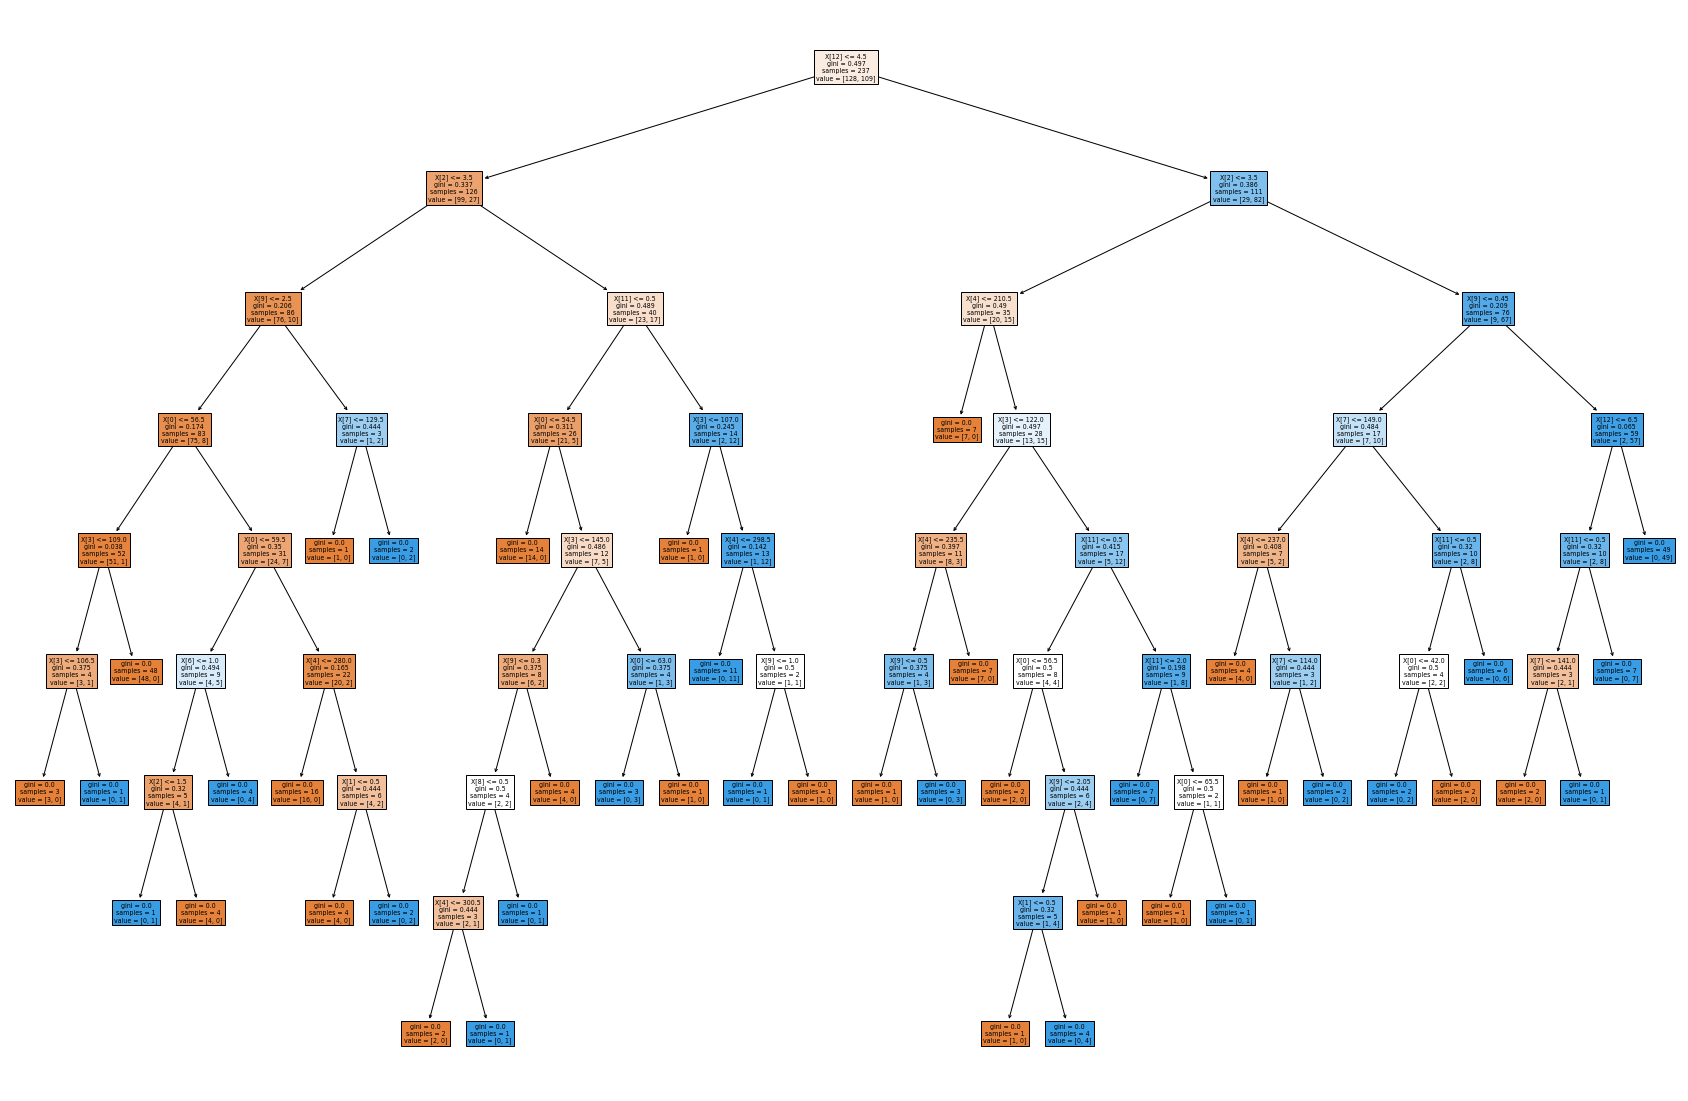

In [88]:
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(model, 
                   filled=True)

#### Prediction Comparison with the test data

In [50]:
y_test['probability'] = np.round(model.predict_proba(X_test)[:,1], 2)
y_test['predicted_heart_disease'] = y_pred

display(y_test.sample(10))

,heart_disease,probability,predicted_heart_disease
278,1,1.0,1
116,0,1.0,1
101,0,0.0,0
300,1,1.0,1
21,0,1.0,1
23,1,1.0,1
104,1,0.0,0
214,1,1.0,1
239,0,0.0,0
64,1,1.0,1


In [51]:
test = pd.concat([X_test, y_test], axis=1)
display(test.sample(10))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease,probability,predicted_heart_disease
163,58,0,4,100,248,0,2,122,0,1.0,2,0,3,0,0.0,0
162,54,0,3,110,214,0,0,158,0,1.6,2,0,3,0,0.0,0
168,35,1,4,126,282,0,2,156,1,0.0,1,0,7,1,1.0,1
239,42,1,2,120,295,0,0,162,0,0.0,1,0,3,0,0.0,0
190,50,1,3,129,196,0,0,163,0,0.0,1,0,3,0,0.0,0
280,57,1,4,110,335,0,0,143,1,3.0,2,1,7,1,1.0,1
187,66,1,2,160,246,0,0,120,1,0.0,2,3,6,1,1.0,1
157,58,1,4,125,300,0,2,171,0,0.0,1,2,7,1,1.0,1
281,47,1,3,130,253,0,0,179,0,0.0,1,0,3,0,0.0,0
265,42,1,4,136,315,0,0,125,1,1.8,2,0,6,1,0.0,0


#### 8. Confusion Matrix, Classification report, and ROC-AUC

#### Confusion Matrix

In [52]:
confusion_matrix_ = confusion_matrix(y_test['heart_disease'], 
                                     y_test['predicted_heart_disease'])

print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[24  8]
 [ 8 20]]


In [53]:
y_test['heart_disease'].value_counts()

0    32
1    28
Name: heart_disease, dtype: int64

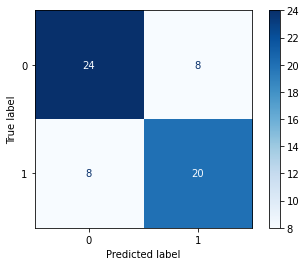

In [54]:
plot_confusion_matrix(model, 
                      X_test, 
                      y_test['heart_disease'], 
                      #display_labels=["not heart disease", "heart disease"],
                      cmap='Blues')
plt.show()

In [55]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  24
False Negatives =  8
False Positives =  8
True Positives =  20


#### Accuracy

In [56]:
print("Calculated __________________________")
# calculate the accuracy of the model from the confusion matrix
accuracy = (TP+TN)/(TP+FP+FN+TN)
print('Accuracy: ', accuracy)

print("\nScikit-Learn ________________________")
# calculate the accuracy of the model using the sklearn built-in function
accuracy_ = accuracy_score(y_test['heart_disease'], 
                           y_test['predicted_heart_disease'])

print('Accuracy: ', accuracy_)

Calculated __________________________
Accuracy:  0.7333333333333333

Scikit-Learn ________________________
Accuracy:  0.7333333333333333


In [57]:
print("Calculated __________________________")
precision = np.round(TP/(TP+FP), 2)
recall = np.round(TP/(TP+FN), 2)
f1_score_ = np.round((2*precision*recall)/(precision+recall), 2)

print("Precision = ", precision)
print("Recall = ", recall)
print("f1 score = ", f1_score_)

print("\nScikit-Learn ________________________")
precision_ = np.round(precision_score(y_test['heart_disease'], 
                                      y_test['predicted_heart_disease']), 2)
recall_ = np.round(recall_score(y_test['heart_disease'], 
                                y_test['predicted_heart_disease']), 2)
f1_score__ = np.round(f1_score(y_test['heart_disease'], 
                               y_test['predicted_heart_disease']), 2)

print("Precision = ", precision_)
print("Recall = ", recall_)
print("f1 score = ", f1_score__)

Calculated __________________________
Precision =  0.71
Recall =  0.71
f1 score =  0.71

Scikit-Learn ________________________
Precision =  0.71
Recall =  0.71
f1 score =  0.71


#### True Positive Rate, False Positive Rate

In [58]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.71
False Positive Rate =  0.25


#### ROC: Receiver Operating Characterisitcs and AUC: Area Under the Curve

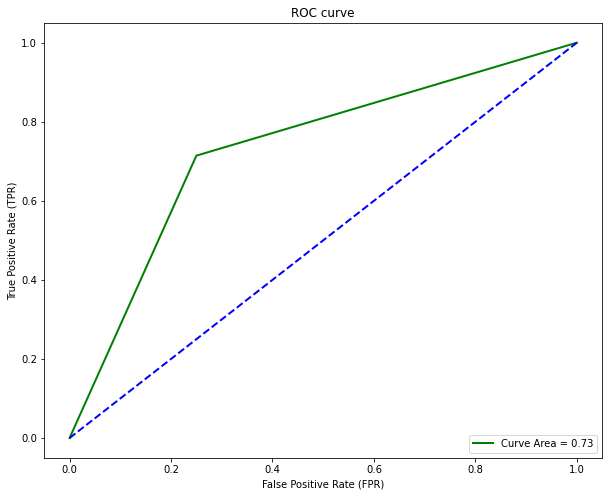

In [59]:
fpr, tpr, thr = roc_curve(y_test['heart_disease'], 
                          y_test['probability'])
auc = np.round(roc_auc_score(y_test['heart_disease'], 
                             y_test['predicted_heart_disease']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [60]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": fpr, "TPR": tpr})
display(roc_data.tail(10))

,threshold,FPR,TPR
0,2.0,0.00,0.000000
1,1.0,0.25,0.714286
2,0.0,1.00,1.000000


#### Classification report

In [61]:
class_report = classification_report(y_test['heart_disease'], 
                                     y_test['predicted_heart_disease'])
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        32
           1       0.71      0.71      0.71        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.73      0.73      0.73        60



#### 9. Explanation of the outcome

- Overall model performed pretty good. Model accuaracy was about 73%, however, most importantly model precision, Recall and f1 score were 71% each, which is much higher. Beside, from ROC curve True Positive Rate was greater (0.71) than False Positive Rate (0.25). So, we can say that decisition tree classifier performed fairly good in detecting heart disease prevalance in the 'cleveland' data set.